# Cleanup steps

1. Import the data
1. Removes all rows that have "rejected" in the "state" columm
1. "state" column then removed
1. Removes the "date_updated" column
1. Sort rows by "date_reserved" column values
1. Generate a correlation matrix
1. The v3.1, v3.0, and v2.0 CVSS scores are colinear while the v4.0 is not. So, we can combine the v3.1, v3.0, and v2.0 by taking the average when present; Corresponding columns are then removed
1. CVSS 2 didnt have a severity in the spec we will first drop the corresponding column
1. "date_reserved" filtered to only show recent data after 2021-01-01 (93698 data included)
1. extraneous columns removed to clean the resulting data: 'assigner', 'affected', 'problem_types'
1. Remove any rows that do not have at least one score for 'epss', 'cvss_v4_score', 'cvss_pre_v4_avg_score'
1. Create a cleaned CSV data file
1. Render a chart of the correlation matrix

In [349]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../daan881_group4_dataset.csv')

print(df.shape)
df.head()

(263420, 24)


C:\Users\clayt\AppData\Local\Temp\ipykernel_23892\3876230719.py:5: DtypeWarning: Columns (9,18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../daan881_group4_dataset.csv')


,cve,date_updated,date_reserved,date_published,state,assigner,affected,problem_types,cvss_v4_score,cvss_v4_severity,...,cvss_v2_score,cvss_v2_severity,attack_vector,attack_complexity,attack_requirements,privileges_required,user_interaction,exploit_maturity,epss,percentile
0,CVE-1999-0001,2024-08-01T16:03:04.917Z,1999-06-07T00:00:00,2000-02-04T05:00:00,PUBLISHED,mitre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00383,0.73315
1,CVE-1999-0002,2024-08-01T16:07:57.748Z,1999-06-07T00:00:00,1999-09-29T04:00:00,PUBLISHED,mitre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02080,0.89305
2,CVE-1999-0003,2024-08-01T16:11:38.579Z,1999-06-07T00:00:00,1999-09-29T04:00:00,PUBLISHED,mitre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04409,0.92560
3,CVE-1999-0004,2024-08-01T16:27:56.463Z,1999-06-07T00:00:00,2000-02-04T05:00:00,PUBLISHED,mitre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00917,0.83123
4,CVE-1999-0005,2024-08-01T16:27:56.689Z,1999-06-07T00:00:00,1999-09-29T04:00:00,PUBLISHED,mitre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.91963,0.98993


In [350]:
df.head()

,cve,date_updated,date_reserved,date_published,state,assigner,affected,problem_types,cvss_v4_score,cvss_v4_severity,...,cvss_v2_score,cvss_v2_severity,attack_vector,attack_complexity,attack_requirements,privileges_required,user_interaction,exploit_maturity,epss,percentile
0,CVE-1999-0001,2024-08-01T16:03:04.917Z,1999-06-07T00:00:00,2000-02-04T05:00:00,PUBLISHED,mitre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00383,0.73315
1,CVE-1999-0002,2024-08-01T16:07:57.748Z,1999-06-07T00:00:00,1999-09-29T04:00:00,PUBLISHED,mitre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02080,0.89305
2,CVE-1999-0003,2024-08-01T16:11:38.579Z,1999-06-07T00:00:00,1999-09-29T04:00:00,PUBLISHED,mitre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04409,0.92560
3,CVE-1999-0004,2024-08-01T16:27:56.463Z,1999-06-07T00:00:00,2000-02-04T05:00:00,PUBLISHED,mitre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00917,0.83123
4,CVE-1999-0005,2024-08-01T16:27:56.689Z,1999-06-07T00:00:00,1999-09-29T04:00:00,PUBLISHED,mitre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.91963,0.98993


Find all the unique values for state. The only values should be "PUBLISHED" and "REJECTED".

In [351]:
state_unique_values = df['state'].unique()

print(state_unique_values) 

['PUBLISHED' 'REJECTED']


Any CVE that is REJECTED isnt considered an actual vulnerability so we should remove all rows with a REJECTED state.

In [352]:
rejected_cves = df[df['state'] == 'REJECTED']

print(rejected_cves.shape)
rejected_cves.head()

(14427, 24)


,cve,date_updated,date_reserved,date_published,state,assigner,affected,problem_types,cvss_v4_score,cvss_v4_severity,...,cvss_v2_score,cvss_v2_severity,attack_vector,attack_complexity,attack_requirements,privileges_required,user_interaction,exploit_maturity,epss,percentile
19,CVE-1999-0020,2005-02-04T00:00:00,1999-06-07T00:00:00,2000-02-04T05:00:00,REJECTED,mitre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01500,0.87197
109,CVE-1999-0110,2005-02-04T00:00:00,1999-06-07T00:00:00,2000-02-04T05:00:00,REJECTED,mitre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01500,0.87197
186,CVE-1999-0187,2005-02-04T00:00:00,1999-06-07T00:00:00,2000-02-04T05:00:00,REJECTED,mitre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01500,0.87197
281,CVE-1999-0282,2005-08-30T00:00:00,1999-06-07T00:00:00,2000-02-04T05:00:00,REJECTED,mitre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01500,0.87197
334,CVE-1999-0335,2022-08-17T02:55:29,1999-06-07T00:00:00,1999-09-29T04:00:00,REJECTED,mitre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00042,0.05085


Remove the rejected rows.

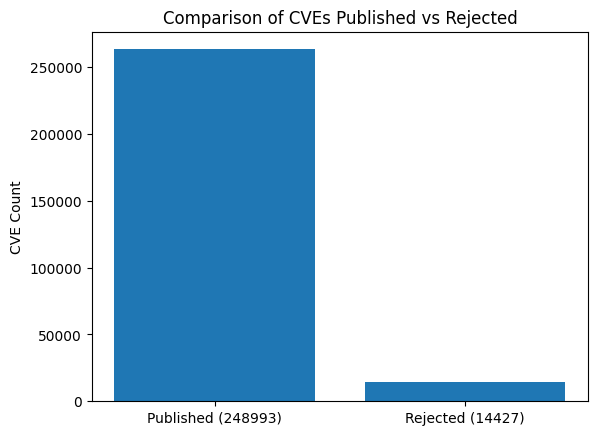

,cve,date_updated,date_reserved,date_published,state,assigner,affected,problem_types,cvss_v4_score,cvss_v4_severity,...,cvss_v2_score,cvss_v2_severity,attack_vector,attack_complexity,attack_requirements,privileges_required,user_interaction,exploit_maturity,epss,percentile
0,CVE-1999-0001,2024-08-01T16:03:04.917Z,1999-06-07T00:00:00,2000-02-04T05:00:00,PUBLISHED,mitre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00383,0.73315
1,CVE-1999-0002,2024-08-01T16:07:57.748Z,1999-06-07T00:00:00,1999-09-29T04:00:00,PUBLISHED,mitre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02080,0.89305
2,CVE-1999-0003,2024-08-01T16:11:38.579Z,1999-06-07T00:00:00,1999-09-29T04:00:00,PUBLISHED,mitre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04409,0.92560
3,CVE-1999-0004,2024-08-01T16:27:56.463Z,1999-06-07T00:00:00,2000-02-04T05:00:00,PUBLISHED,mitre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00917,0.83123
4,CVE-1999-0005,2024-08-01T16:27:56.689Z,1999-06-07T00:00:00,1999-09-29T04:00:00,PUBLISHED,mitre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.91963,0.98993


In [353]:
initial_count = df.shape[0]

df = df[df['state'] != 'REJECTED']

total_rejected = initial_count - df.shape[0]

labels = [f'Published ({df.shape[0]})', f'Rejected ({total_rejected})']
values = [initial_count,total_rejected]

plt.bar(labels, values)

plt.title('Comparison of CVEs Published vs Rejected')
plt.ylabel('CVE Count')

# Show the plot
plt.show()


df.head()

Since all rows now have a PUBLISHED state, we can remove the state column

In [354]:
df = df.drop('state', axis=1)

df.head()

,cve,date_updated,date_reserved,date_published,assigner,affected,problem_types,cvss_v4_score,cvss_v4_severity,cvss_v3_1_score,...,cvss_v2_score,cvss_v2_severity,attack_vector,attack_complexity,attack_requirements,privileges_required,user_interaction,exploit_maturity,epss,percentile
0,CVE-1999-0001,2024-08-01T16:03:04.917Z,1999-06-07T00:00:00,2000-02-04T05:00:00,mitre,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00383,0.73315
1,CVE-1999-0002,2024-08-01T16:07:57.748Z,1999-06-07T00:00:00,1999-09-29T04:00:00,mitre,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02080,0.89305
2,CVE-1999-0003,2024-08-01T16:11:38.579Z,1999-06-07T00:00:00,1999-09-29T04:00:00,mitre,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04409,0.92560
3,CVE-1999-0004,2024-08-01T16:27:56.463Z,1999-06-07T00:00:00,2000-02-04T05:00:00,mitre,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00917,0.83123
4,CVE-1999-0005,2024-08-01T16:27:56.689Z,1999-06-07T00:00:00,1999-09-29T04:00:00,mitre,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.91963,0.98993


Since there are 3 different dates being tracked the time-order of the data can be ambiguous. The updated date is a timestamp for the last time the CVE was updated. The reserved date is the timestamp of when the cve identifier was reserved. The published date is the timestamp that the cve was released to the public. The reserved date is the most reasonable date to use to maintain the time order of the data. So, we can drop the updated dates. Any rows that have a empty value for the reserved date should be dropped.

In [355]:
without_reserved = df[df['date_reserved'].isnull()]

without_reserved.shape

(499, 23)

In [356]:
without_reserved.head()

,cve,date_updated,date_reserved,date_published,assigner,affected,problem_types,cvss_v4_score,cvss_v4_severity,cvss_v3_1_score,...,cvss_v2_score,cvss_v2_severity,attack_vector,attack_complexity,attack_requirements,privileges_required,user_interaction,exploit_maturity,epss,percentile
151107,CVE-2020-18305,2024-08-04T14:00:49.157Z,NaN,NaN,mitre,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NETWORK,LOW,NaN,LOW,REQUIRED,NaN,NaN,NaN
193595,CVE-2022-25037,2024-08-19T18:15:03.504Z,NaN,NaN,mitre,NaN,NaN,NaN,NaN,5.4,...,NaN,NaN,NETWORK,LOW,NaN,LOW,REQUIRED,NaN,NaN,NaN
193596,CVE-2022-25038,2024-08-22T18:29:23.112Z,NaN,NaN,mitre,NaN,NaN,NaN,NaN,6.1,...,NaN,NaN,NETWORK,LOW,NaN,NONE,REQUIRED,NaN,NaN,NaN
195749,CVE-2022-28132,2024-08-23T19:59:19.208Z,NaN,NaN,mitre,NaN,NaN,NaN,NaN,7.2,...,NaN,NaN,NETWORK,LOW,NaN,HIGH,NONE,NaN,NaN,NaN
199890,CVE-2022-32502,2024-08-03T07:46:43.419Z,NaN,NaN,mitre,NaN,NaN,NaN,NaN,6.3,...,NaN,NaN,NETWORK,LOW,NaN,LOW,NONE,NaN,NaN,NaN


Remove the rows without a reserved date.

In [357]:
df.dropna(subset=['date_reserved'], inplace=True)

df.shape

(248494, 23)

In [358]:
without_published = df[df['date_reserved'].isnull()]

without_published.shape

(0, 23)

Drop the updated dates

In [359]:
df = df.drop('date_updated', axis=1)

print(df.shape)
df.head()

(248494, 22)


,cve,date_reserved,date_published,assigner,affected,problem_types,cvss_v4_score,cvss_v4_severity,cvss_v3_1_score,cvss_v3_1_severity,...,cvss_v2_score,cvss_v2_severity,attack_vector,attack_complexity,attack_requirements,privileges_required,user_interaction,exploit_maturity,epss,percentile
0,CVE-1999-0001,1999-06-07T00:00:00,2000-02-04T05:00:00,mitre,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00383,0.73315
1,CVE-1999-0002,1999-06-07T00:00:00,1999-09-29T04:00:00,mitre,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02080,0.89305
2,CVE-1999-0003,1999-06-07T00:00:00,1999-09-29T04:00:00,mitre,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04409,0.92560
3,CVE-1999-0004,1999-06-07T00:00:00,2000-02-04T05:00:00,mitre,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00917,0.83123
4,CVE-1999-0005,1999-06-07T00:00:00,1999-09-29T04:00:00,mitre,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.91963,0.98993


Sort the dataframe by the published date

In [360]:
df['date_reserved'] = pd.to_datetime(df['date_reserved'], format='mixed', utc=True)
df.sort_values(by='date_reserved', inplace=True, ascending=False)

df.head()

,cve,date_reserved,date_published,assigner,affected,problem_types,cvss_v4_score,cvss_v4_severity,cvss_v3_1_score,cvss_v3_1_severity,...,cvss_v2_score,cvss_v2_severity,attack_vector,attack_complexity,attack_requirements,privileges_required,user_interaction,exploit_maturity,epss,percentile
263419,CVE-2024-8969,2024-09-18 04:19:44.810000+00:00,2024-09-18T06:53:53.016Z,twcert,The SYSCOM Group::OMFLOW,CWE-200 Exposure of Sensitive Information to a...,NaN,NaN,6.5,MEDIUM,...,NaN,NaN,NETWORK,LOW,NaN,LOW,NONE,NaN,NaN,NaN
263418,CVE-2024-8957,2024-09-17 19:08:48.129000+00:00,2024-09-17T20:08:25.588Z,VulnCheck,PTZOptics::PT30X-SDI PTZOptics::PT30X-NDI,CWE-78 Improper Neutralization of Special Elem...,NaN,NaN,7.2,HIGH,...,NaN,NaN,NETWORK,LOW,NaN,HIGH,NONE,NaN,NaN,NaN
263417,CVE-2024-8956,2024-09-17 19:08:47.005000+00:00,2024-09-17T19:59:27.205Z,VulnCheck,PTZOptics::PT30X-SDI PTZOptics::PT30X-NDI,CWE-287 Improper Authentication,NaN,NaN,9.1,CRITICAL,...,NaN,NaN,NETWORK,LOW,NaN,NONE,NONE,NaN,NaN,NaN
263416,CVE-2024-8951,2024-09-17 15:24:05.559000+00:00,2024-09-17T20:00:08.078Z,VulDB,SourceCodester::Resort Reservation System,Cross Site Scripting,5.3,MEDIUM,3.5,LOW,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259712,CVE-2024-47059,2024-09-17 13:41:00.585000+00:00,2024-09-18T21:19:26.951Z,Mautic,Mautic::Mautic,CWE-200 Exposure of Sensitive Information to a...,NaN,NaN,0.0,NONE,...,NaN,NaN,NETWORK,HIGH,NaN,NONE,NONE,NaN,NaN,NaN


remove anything before the specified date

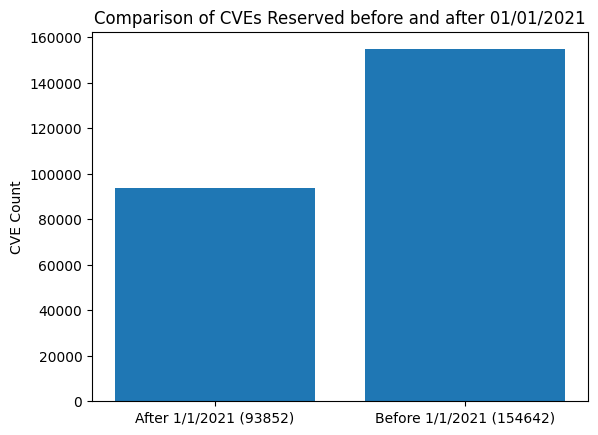

,cve,date_reserved,date_published,assigner,affected,problem_types,cvss_v4_score,cvss_v4_severity,cvss_v3_1_score,cvss_v3_1_severity,...,cvss_v2_score,cvss_v2_severity,attack_vector,attack_complexity,attack_requirements,privileges_required,user_interaction,exploit_maturity,epss,percentile
263419,CVE-2024-8969,2024-09-18 04:19:44.810000+00:00,2024-09-18T06:53:53.016Z,twcert,The SYSCOM Group::OMFLOW,CWE-200 Exposure of Sensitive Information to a...,NaN,NaN,6.5,MEDIUM,...,NaN,NaN,NETWORK,LOW,NaN,LOW,NONE,NaN,NaN,NaN
263418,CVE-2024-8957,2024-09-17 19:08:48.129000+00:00,2024-09-17T20:08:25.588Z,VulnCheck,PTZOptics::PT30X-SDI PTZOptics::PT30X-NDI,CWE-78 Improper Neutralization of Special Elem...,NaN,NaN,7.2,HIGH,...,NaN,NaN,NETWORK,LOW,NaN,HIGH,NONE,NaN,NaN,NaN
263417,CVE-2024-8956,2024-09-17 19:08:47.005000+00:00,2024-09-17T19:59:27.205Z,VulnCheck,PTZOptics::PT30X-SDI PTZOptics::PT30X-NDI,CWE-287 Improper Authentication,NaN,NaN,9.1,CRITICAL,...,NaN,NaN,NETWORK,LOW,NaN,NONE,NONE,NaN,NaN,NaN
263416,CVE-2024-8951,2024-09-17 15:24:05.559000+00:00,2024-09-17T20:00:08.078Z,VulDB,SourceCodester::Resort Reservation System,Cross Site Scripting,5.3,MEDIUM,3.5,LOW,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259712,CVE-2024-47059,2024-09-17 13:41:00.585000+00:00,2024-09-18T21:19:26.951Z,Mautic,Mautic::Mautic,CWE-200 Exposure of Sensitive Information to a...,NaN,NaN,0.0,NONE,...,NaN,NaN,NETWORK,HIGH,NaN,NONE,NONE,NaN,NaN,NaN


In [361]:

initial_count = df.shape[0]

df = df[df['date_reserved'] > '2021-01-01']

after_2021 = initial_count - df.shape[0]

labels = [f'After 1/1/2021 ({df.shape[0]})', f'Before 1/1/2021 ({after_2021})']
values = [df.shape[0],after_2021]

plt.bar(labels, values)

plt.title('Comparison of CVEs Reserved before and after 01/01/2021')
plt.ylabel('CVE Count')

# Show the plot
plt.show()

df.head()

To determine how we should clean the CVSS scores, we first need to check for colinearity between each score for CVEs that have all 4 scores.

In [362]:
score_data = df[df[['cvss_v4_score','cvss_v3_1_score','cvss_v3_score','cvss_v2_score']].notna().all(1)]
score_data = score_data[['cvss_v4_score','cvss_v3_1_score','cvss_v3_score','cvss_v2_score']]

print(score_data.shape)
score_data.head()

(1001, 4)


,cvss_v4_score,cvss_v3_1_score,cvss_v3_score,cvss_v2_score
263416,5.3,3.5,3.5,4.0
263415,5.3,6.3,6.3,6.5
263414,6.9,7.3,7.3,7.5
263413,6.3,5.6,5.6,5.1
263412,6.9,7.3,7.3,7.5


In [363]:
# Calculate the correlation matrix
correlation_matrix = score_data.corr()

print(correlation_matrix)

                 cvss_v4_score  cvss_v3_1_score  cvss_v3_score  cvss_v2_score
cvss_v4_score         1.000000         0.613332       0.613332       0.610384
cvss_v3_1_score       0.613332         1.000000       1.000000       0.971925
cvss_v3_score         0.613332         1.000000       1.000000       0.971925
cvss_v2_score         0.610384         0.971925       0.971925       1.000000


In [364]:
threshold = 0.9
highly_correlated = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns if col1 != col2 and abs(correlation_matrix[col1][col2]) > threshold]
print(highly_correlated)

[('cvss_v3_1_score', 'cvss_v3_score'), ('cvss_v3_1_score', 'cvss_v2_score'), ('cvss_v3_score', 'cvss_v3_1_score'), ('cvss_v3_score', 'cvss_v2_score'), ('cvss_v2_score', 'cvss_v3_1_score'), ('cvss_v2_score', 'cvss_v3_score')]


We can see above that v3.1, v3.0, and v2.0 CVSS scores are colinear while the v4.0 is not. So, we can combine the v3.1, v3.0, and v2.0 by taking the average when present.

In [365]:
def avg_pre_v4_cvss(v31,v30,v20):
    values = []

    if pd.notna(v31) and v31 is not None:
        values.append(v31)

    if pd.notna(v30) and v30 is not None:
        values.append(v30)
    
    if pd.notna(v20) and v20 is not None:
        values.append(v20)
    
    if values:
        return sum(values) / len(values)

    return None

df['cvss_pre_v4_avg_score'] = df.apply(lambda row: avg_pre_v4_cvss(row['cvss_v3_1_score'], row['cvss_v3_score'], row['cvss_v2_score']), axis=1)

df = df.drop('cvss_v3_1_score', axis=1)
df = df.drop('cvss_v3_score', axis=1)
df = df.drop('cvss_v2_score', axis=1)

df.head()

,cve,date_reserved,date_published,assigner,affected,problem_types,cvss_v4_score,cvss_v4_severity,cvss_v3_1_severity,cvss_v3_severity,cvss_v2_severity,attack_vector,attack_complexity,attack_requirements,privileges_required,user_interaction,exploit_maturity,epss,percentile,cvss_pre_v4_avg_score
263419,CVE-2024-8969,2024-09-18 04:19:44.810000+00:00,2024-09-18T06:53:53.016Z,twcert,The SYSCOM Group::OMFLOW,CWE-200 Exposure of Sensitive Information to a...,NaN,NaN,MEDIUM,NaN,NaN,NETWORK,LOW,NaN,LOW,NONE,NaN,NaN,NaN,6.500000
263418,CVE-2024-8957,2024-09-17 19:08:48.129000+00:00,2024-09-17T20:08:25.588Z,VulnCheck,PTZOptics::PT30X-SDI PTZOptics::PT30X-NDI,CWE-78 Improper Neutralization of Special Elem...,NaN,NaN,HIGH,NaN,NaN,NETWORK,LOW,NaN,HIGH,NONE,NaN,NaN,NaN,7.200000
263417,CVE-2024-8956,2024-09-17 19:08:47.005000+00:00,2024-09-17T19:59:27.205Z,VulnCheck,PTZOptics::PT30X-SDI PTZOptics::PT30X-NDI,CWE-287 Improper Authentication,NaN,NaN,CRITICAL,NaN,NaN,NETWORK,LOW,NaN,NONE,NONE,NaN,NaN,NaN,9.100000
263416,CVE-2024-8951,2024-09-17 15:24:05.559000+00:00,2024-09-17T20:00:08.078Z,VulDB,SourceCodester::Resort Reservation System,Cross Site Scripting,5.3,MEDIUM,LOW,LOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.666667
259712,CVE-2024-47059,2024-09-17 13:41:00.585000+00:00,2024-09-18T21:19:26.951Z,Mautic,Mautic::Mautic,CWE-200 Exposure of Sensitive Information to a...,NaN,NaN,NONE,NaN,NaN,NETWORK,HIGH,NaN,NONE,NONE,NaN,NaN,NaN,0.000000


Now that we have combined the scores of v3.1, v3.0, and v2.0, we should also combine the severity of the same versions. We will do so by taking the highest ranking severity of the versions.

In [366]:
df['cvss_v3_1_severity'].unique()

array(['MEDIUM', 'HIGH', 'CRITICAL', 'LOW', 'NONE', nan], dtype=object)

In [367]:
df['cvss_v3_severity'].unique()

array([nan, 'LOW', 'MEDIUM', 'HIGH', 'CRITICAL', 'NONE'], dtype=object)

In [368]:
df['cvss_v2_severity'].unique()

array([nan])

Since CVSS 2 didnt have a severity in the spec we will first drop that column.

In [369]:
df = df.drop('cvss_v2_severity', axis=1)

df.head()

,cve,date_reserved,date_published,assigner,affected,problem_types,cvss_v4_score,cvss_v4_severity,cvss_v3_1_severity,cvss_v3_severity,attack_vector,attack_complexity,attack_requirements,privileges_required,user_interaction,exploit_maturity,epss,percentile,cvss_pre_v4_avg_score
263419,CVE-2024-8969,2024-09-18 04:19:44.810000+00:00,2024-09-18T06:53:53.016Z,twcert,The SYSCOM Group::OMFLOW,CWE-200 Exposure of Sensitive Information to a...,NaN,NaN,MEDIUM,NaN,NETWORK,LOW,NaN,LOW,NONE,NaN,NaN,NaN,6.500000
263418,CVE-2024-8957,2024-09-17 19:08:48.129000+00:00,2024-09-17T20:08:25.588Z,VulnCheck,PTZOptics::PT30X-SDI PTZOptics::PT30X-NDI,CWE-78 Improper Neutralization of Special Elem...,NaN,NaN,HIGH,NaN,NETWORK,LOW,NaN,HIGH,NONE,NaN,NaN,NaN,7.200000
263417,CVE-2024-8956,2024-09-17 19:08:47.005000+00:00,2024-09-17T19:59:27.205Z,VulnCheck,PTZOptics::PT30X-SDI PTZOptics::PT30X-NDI,CWE-287 Improper Authentication,NaN,NaN,CRITICAL,NaN,NETWORK,LOW,NaN,NONE,NONE,NaN,NaN,NaN,9.100000
263416,CVE-2024-8951,2024-09-17 15:24:05.559000+00:00,2024-09-17T20:00:08.078Z,VulDB,SourceCodester::Resort Reservation System,Cross Site Scripting,5.3,MEDIUM,LOW,LOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.666667
259712,CVE-2024-47059,2024-09-17 13:41:00.585000+00:00,2024-09-18T21:19:26.951Z,Mautic,Mautic::Mautic,CWE-200 Exposure of Sensitive Information to a...,NaN,NaN,NONE,NaN,NETWORK,HIGH,NaN,NONE,NONE,NaN,NaN,NaN,0.000000


In [370]:
def combine_severity(v31,v30):
    severities = ["CRITICAL", "HIGH", "MEDIUM", "LOW"]

    for severity in severities:
        if ((pd.notna(v31) and v31 == severity) 
            or (pd.notna(v30) and v30 == severity)):
            return severity

    return None

df['cvss_pre_v4_avg_severity'] = df.apply(lambda row: combine_severity(row['cvss_v3_1_severity'], row['cvss_v3_severity']), axis=1)

df = df.drop('cvss_v3_1_severity', axis=1)
df = df.drop('cvss_v3_severity', axis=1)

df.head()

,cve,date_reserved,date_published,assigner,affected,problem_types,cvss_v4_score,cvss_v4_severity,attack_vector,attack_complexity,attack_requirements,privileges_required,user_interaction,exploit_maturity,epss,percentile,cvss_pre_v4_avg_score,cvss_pre_v4_avg_severity
263419,CVE-2024-8969,2024-09-18 04:19:44.810000+00:00,2024-09-18T06:53:53.016Z,twcert,The SYSCOM Group::OMFLOW,CWE-200 Exposure of Sensitive Information to a...,NaN,NaN,NETWORK,LOW,NaN,LOW,NONE,NaN,NaN,NaN,6.500000,MEDIUM
263418,CVE-2024-8957,2024-09-17 19:08:48.129000+00:00,2024-09-17T20:08:25.588Z,VulnCheck,PTZOptics::PT30X-SDI PTZOptics::PT30X-NDI,CWE-78 Improper Neutralization of Special Elem...,NaN,NaN,NETWORK,LOW,NaN,HIGH,NONE,NaN,NaN,NaN,7.200000,HIGH
263417,CVE-2024-8956,2024-09-17 19:08:47.005000+00:00,2024-09-17T19:59:27.205Z,VulnCheck,PTZOptics::PT30X-SDI PTZOptics::PT30X-NDI,CWE-287 Improper Authentication,NaN,NaN,NETWORK,LOW,NaN,NONE,NONE,NaN,NaN,NaN,9.100000,CRITICAL
263416,CVE-2024-8951,2024-09-17 15:24:05.559000+00:00,2024-09-17T20:00:08.078Z,VulDB,SourceCodester::Resort Reservation System,Cross Site Scripting,5.3,MEDIUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.666667,LOW
259712,CVE-2024-47059,2024-09-17 13:41:00.585000+00:00,2024-09-18T21:19:26.951Z,Mautic,Mautic::Mautic,CWE-200 Exposure of Sensitive Information to a...,NaN,NaN,NETWORK,HIGH,NaN,NONE,NONE,NaN,NaN,NaN,0.000000,None


Remove unneccessary data

In [371]:
df = df.drop('assigner', axis=1)
df = df.drop('affected', axis=1)
df = df.drop('problem_types', axis=1)
df.head()

,cve,date_reserved,date_published,cvss_v4_score,cvss_v4_severity,attack_vector,attack_complexity,attack_requirements,privileges_required,user_interaction,exploit_maturity,epss,percentile,cvss_pre_v4_avg_score,cvss_pre_v4_avg_severity
263419,CVE-2024-8969,2024-09-18 04:19:44.810000+00:00,2024-09-18T06:53:53.016Z,NaN,NaN,NETWORK,LOW,NaN,LOW,NONE,NaN,NaN,NaN,6.500000,MEDIUM
263418,CVE-2024-8957,2024-09-17 19:08:48.129000+00:00,2024-09-17T20:08:25.588Z,NaN,NaN,NETWORK,LOW,NaN,HIGH,NONE,NaN,NaN,NaN,7.200000,HIGH
263417,CVE-2024-8956,2024-09-17 19:08:47.005000+00:00,2024-09-17T19:59:27.205Z,NaN,NaN,NETWORK,LOW,NaN,NONE,NONE,NaN,NaN,NaN,9.100000,CRITICAL
263416,CVE-2024-8951,2024-09-17 15:24:05.559000+00:00,2024-09-17T20:00:08.078Z,5.3,MEDIUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.666667,LOW
259712,CVE-2024-47059,2024-09-17 13:41:00.585000+00:00,2024-09-18T21:19:26.951Z,NaN,NaN,NETWORK,HIGH,NaN,NONE,NONE,NaN,NaN,NaN,0.000000,None


For rows without v4 or pre-v4 or epss scores, drop.

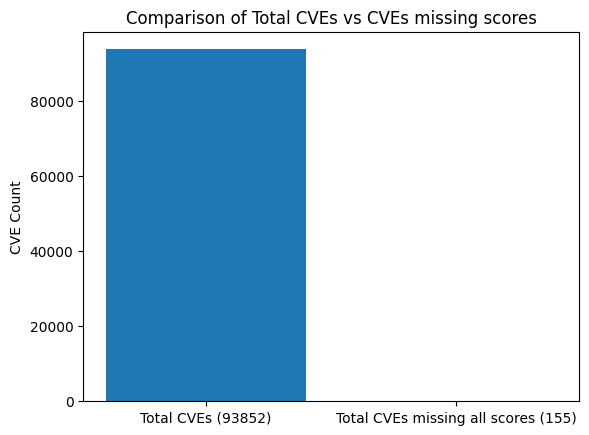

In [372]:
initial_count = df.shape[0]

df = df.dropna(subset=['epss', 'cvss_v4_score', 'cvss_pre_v4_avg_score'], how='all')

total_missing_scores = initial_count - df.shape[0]

labels = [f'Total CVEs ({initial_count})', f'Total CVEs missing all scores ({total_missing_scores})']
values = [initial_count,total_missing_scores]

plt.bar(labels, values)

plt.title('Comparison of Total CVEs vs CVEs missing scores')
plt.ylabel('CVE Count')

# Show the plot
plt.show()

Output to a cleaned CSV file

In [373]:
df.to_csv("daan881_group4_dataset.cleaned.csv", index=False)

In [374]:
df.shape

(93697, 15)

Add a chart of the correlation matrix

<Axes: >

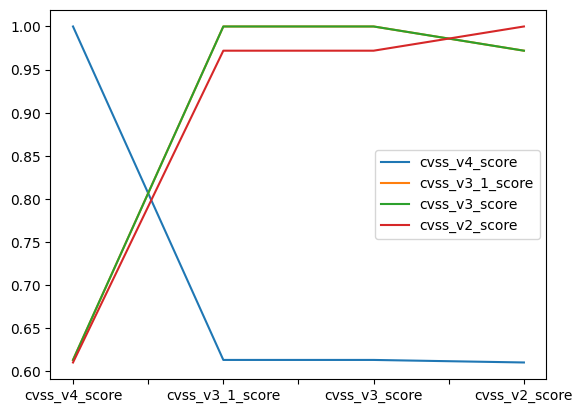

In [375]:
correlation_matrix.plot()

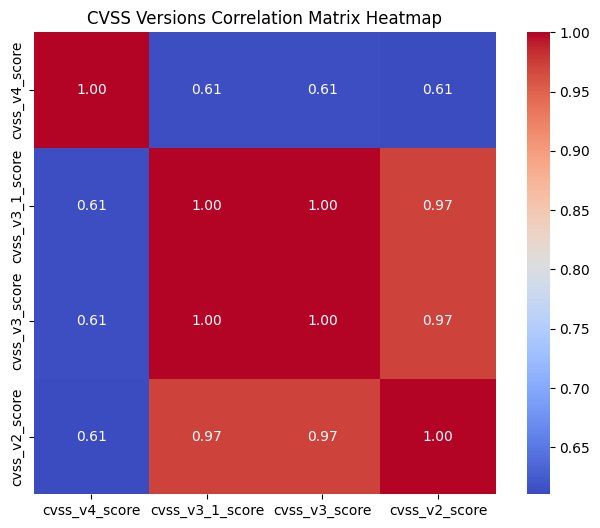

In [376]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('CVSS Versions Correlation Matrix Heatmap')
plt.show()

In [377]:
#assigners = df["assigner"].unique()

#assigners.shape

### Whats left?

1. Remove anything after a certain date - DONE
    - 3-5 years
1. Crop columns that add no benefit - DONE
    - Assigner, Affected, Problem Types?
1. Figure out what we want to do with v4 cvss and pre-v4 cvss metrics since they are not colinear - DONE, WRITE UP
    - Maybe we just explain in the writeup that they are not colinear but both add value.
1. Remove anything that doesnt have any values for cvss or epss - DONE
    - For rows without v4 or pre-v4 or epss scores, drop.
1. Figure out why there is a gap between reserved and published date? Does it add benefit by having both? - DONE, WRITE UP
    - It appears that its not published until the affected software corporation achnowledges the vulnerability
1. Why are some CVEs missing reserved and published date? Should we be droping these rows (we already are)
     - Probably dropping them is fine but I'd like a second set of eyes on the data :)
1. Create some visualizations - DONE
    - Use the data from the correlation matrix above to show which versions of CVSS are colinear
1. Create writeup for the cleaning we have done and put it in the template
    - Describe each step of the cleaning process
        - Take which I highlighted above in this jupyter notebook but we will need to expand on each.